# Cat Detector 
### Complete # TODO

# Requirements

In [223]:
import cv2
import os
import matplotlib.pyplot as plt

# Loading Image

In [224]:
# Define the path to the image file using os.path.join for cross-platform compatibility
image_address = os.path.join("images", "image.webp")

# Define the path to the Haar Cascade model file using os.path.join for cross-platform compatibility
model = os.path.join("models", "haarcascade_frontalcatface_extended.xml")

# Read the input image from the specified path
image = cv2.imread(image_address)

# Convert the image from BGR to RGB format (as OpenCV uses BGR by default and Matplotlib uses RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


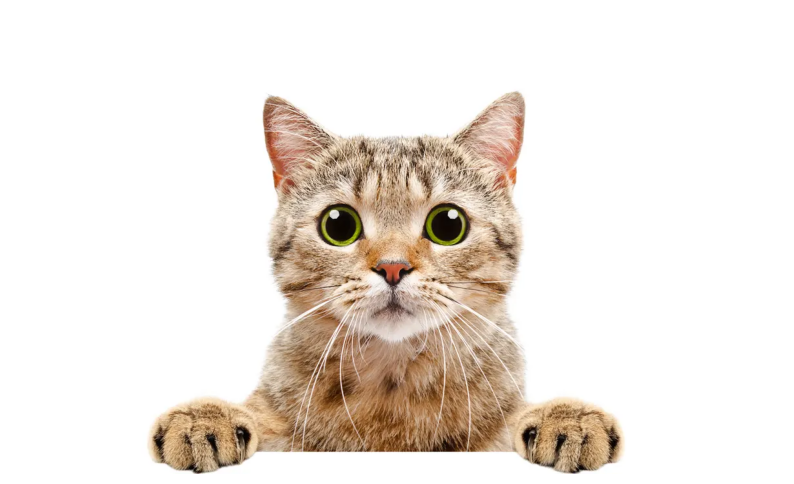

In [225]:
# Create a figure with specified size to display the image
plt.figure(figsize=(10, 8))

# Display the image using Matplotlib
plt.imshow(image)

# Turn off the axis for a cleaner look
plt.axis('off')

# Show the figure
plt.show()

# Detecting Cat

In [226]:
# Load the Haar Cascade model for cat face detection
detector = cv2.CascadeClassifier(model)

# Detect cat faces in the image using the loaded model
# scaleFactor: Parameter specifying how much the image size is reduced at each image scale
# minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it
# minSize: Minimum possible object size. Objects smaller than this are ignored.
rects = detector.detectMultiScale(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), scaleFactor=1.1, minNeighbors=4, minSize=(200, 200))

# Iterate over the detected rectangles (bounding boxes for cat faces)
for (i, (x, y, w, h)) in enumerate(rects):
    # Draw a rectangle around the detected cat face
    # Annotate the image with the text 'Cat #N' above the rectangle
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(image, f'Cat #{i+1}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

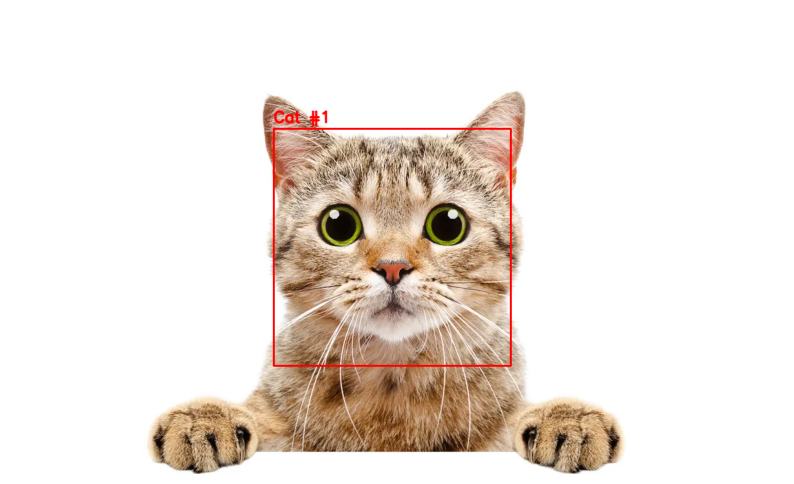

In [227]:
# Create a figure with specified size to display the image
plt.figure(figsize=(10, 8))

# Display the image with detected cat faces and annotations
plt.imshow(image)


# Turn off the axis for a cleaner look
plt.axis('off')

# Show the figure
plt.show()
